# How to use Decision Tree for Regression in SkLearn

## Import libraries

In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set()

In [2]:
# https://drive.google.com/file/d/1Kees3lk-Zo7AsrYz7svcj8Hnbr6gHok6/view
df = pd.read_csv('cali_housing.csv')
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


## Visualize Data

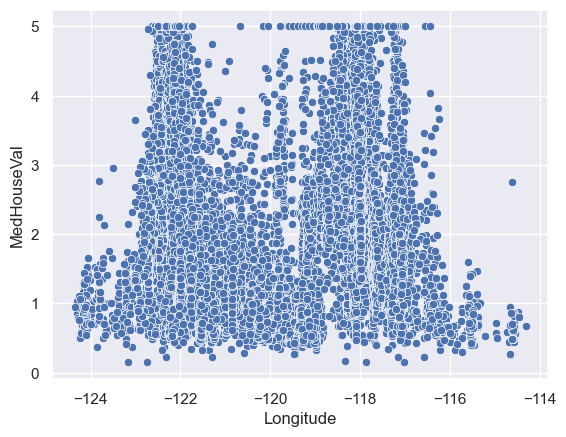

In [3]:
sns.scatterplot(x=df['Longitude'],
                y=df['MedHouseVal'])

plt.savefig('scatterplot.png')

## Build the Model

In [4]:
#Import the class
from sklearn.tree import DecisionTreeRegressor

X = df[['Longitude']] #Two-dimensional (pd DataFrame)
y = df['MedHouseVal'] #One-dimensional (pd Series)

#Create an object (model)
dtr1 = DecisionTreeRegressor(max_depth=2,
                             random_state=1)

#Fit (train) the model
dtr1.fit(X, y)

DecisionTreeRegressor(max_depth=2, random_state=1)

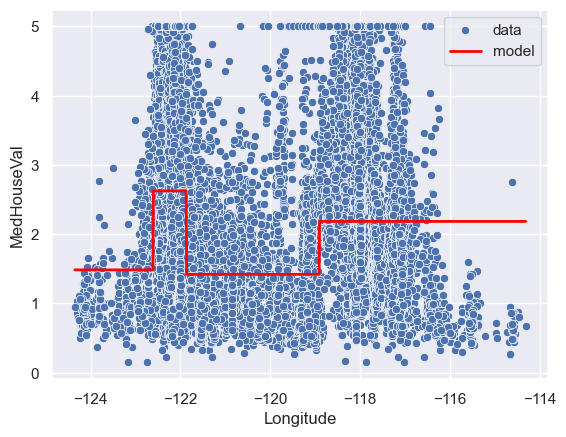

In [5]:
sns.scatterplot(x=df['Longitude'],
                y=df['MedHouseVal'],
                label='data')

plt.plot(df['Longitude'].sort_values(),       
         dtr1.predict(df['Longitude'].sort_values().to_frame()),
         color='red', label='model',
         linewidth=2)

plt.legend()

plt.savefig('model.png')

In [ ]:
# !pip install graphviz

In [12]:
from sklearn.tree import export_graphviz
import graphviz

dot_data = export_graphviz(dtr1, feature_names=['Longitude'],  
                           filled=True, rounded=True)  

graph = graphviz.Source(dot_data)
graph.render("tree", format='png')

'tree.png'

## Hyperparameter Tuning for Decision Tree Regression

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10,
                                                    random_state=0,
                                                    shuffle=True)

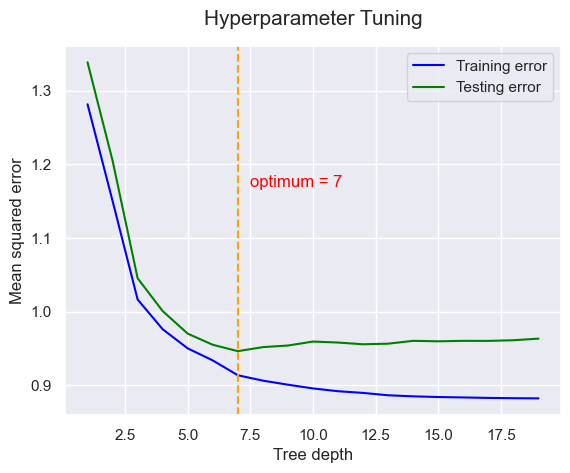

In [14]:
from sklearn.metrics import mean_squared_error as mse

max_depths = range(1, 20)
training_error = []
for max_depth in max_depths:
    model_1 = DecisionTreeRegressor(max_depth=max_depth)
    model_1.fit(X, y)
    training_error.append(mse(y, model_1.predict(X)))
    
testing_error = []
for max_depth in max_depths:
    model_2 = DecisionTreeRegressor(max_depth=max_depth)
    model_2.fit(X_train, y_train)
    testing_error.append(mse(y_test, model_2.predict(X_test)))

plt.plot(max_depths, training_error, color='blue', label='Training error')
plt.plot(max_depths, testing_error, color='green', label='Testing error')
plt.xlabel('Tree depth')
plt.axvline(x=7, color='orange', linestyle='--')
plt.annotate('optimum = 7', xy=(7.5, 1.17), color='red')
plt.ylabel('Mean squared error')
plt.title('Hyperparameter Tuning', pad=15, size=15)
plt.legend()
plt.savefig('error.png')

### Using k-fold cross-validation

In [15]:
from sklearn.model_selection import GridSearchCV

model = DecisionTreeRegressor()

gs = GridSearchCV(model,
                  param_grid = {'max_depth': range(1, 11),
                                'min_samples_split': range(10, 60, 10)},
                  cv=5,
                  n_jobs=1,
                  scoring='neg_mean_squared_error')

gs.fit(X_train, y_train)

print(gs.best_params_)
print(-gs.best_score_)

{'max_depth': 9, 'min_samples_split': 50}
0.9363438182696401


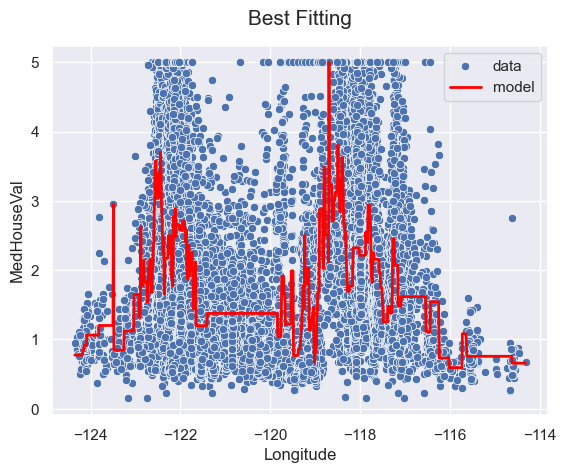

In [16]:
sns.scatterplot(x=df['Longitude'],
                y=df['MedHouseVal'],
                label='data')

new_model = DecisionTreeRegressor(max_depth=9,
                                  min_samples_split=50)
#or new_model = gs.best_estimator_
new_model.fit(X_train, y_train)

plt.plot(df['Longitude'].sort_values(),       
         new_model.predict(df['Longitude'].sort_values().to_frame()),
         color='red', label='model',
         linewidth=2)

plt.legend()
plt.title('Best Fitting', pad=15, size=15)
plt.savefig('new_model.png')